In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
bank_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSz3Yx52trZcGRODnR1-aMr8bTTKZDGsZbJj1kw5ms_H5ZOypBXNd2Hyx1bn1A8sznMTQOtCUniEnvJ/pub?output=csv")

#ABANDONO DE CLIENTES EN TARJETAS DE CRÉDITO


**Integrante:**
- Alejandro Gutierrez 
- Lourdes Rojos
- Juan Pablo Manzano





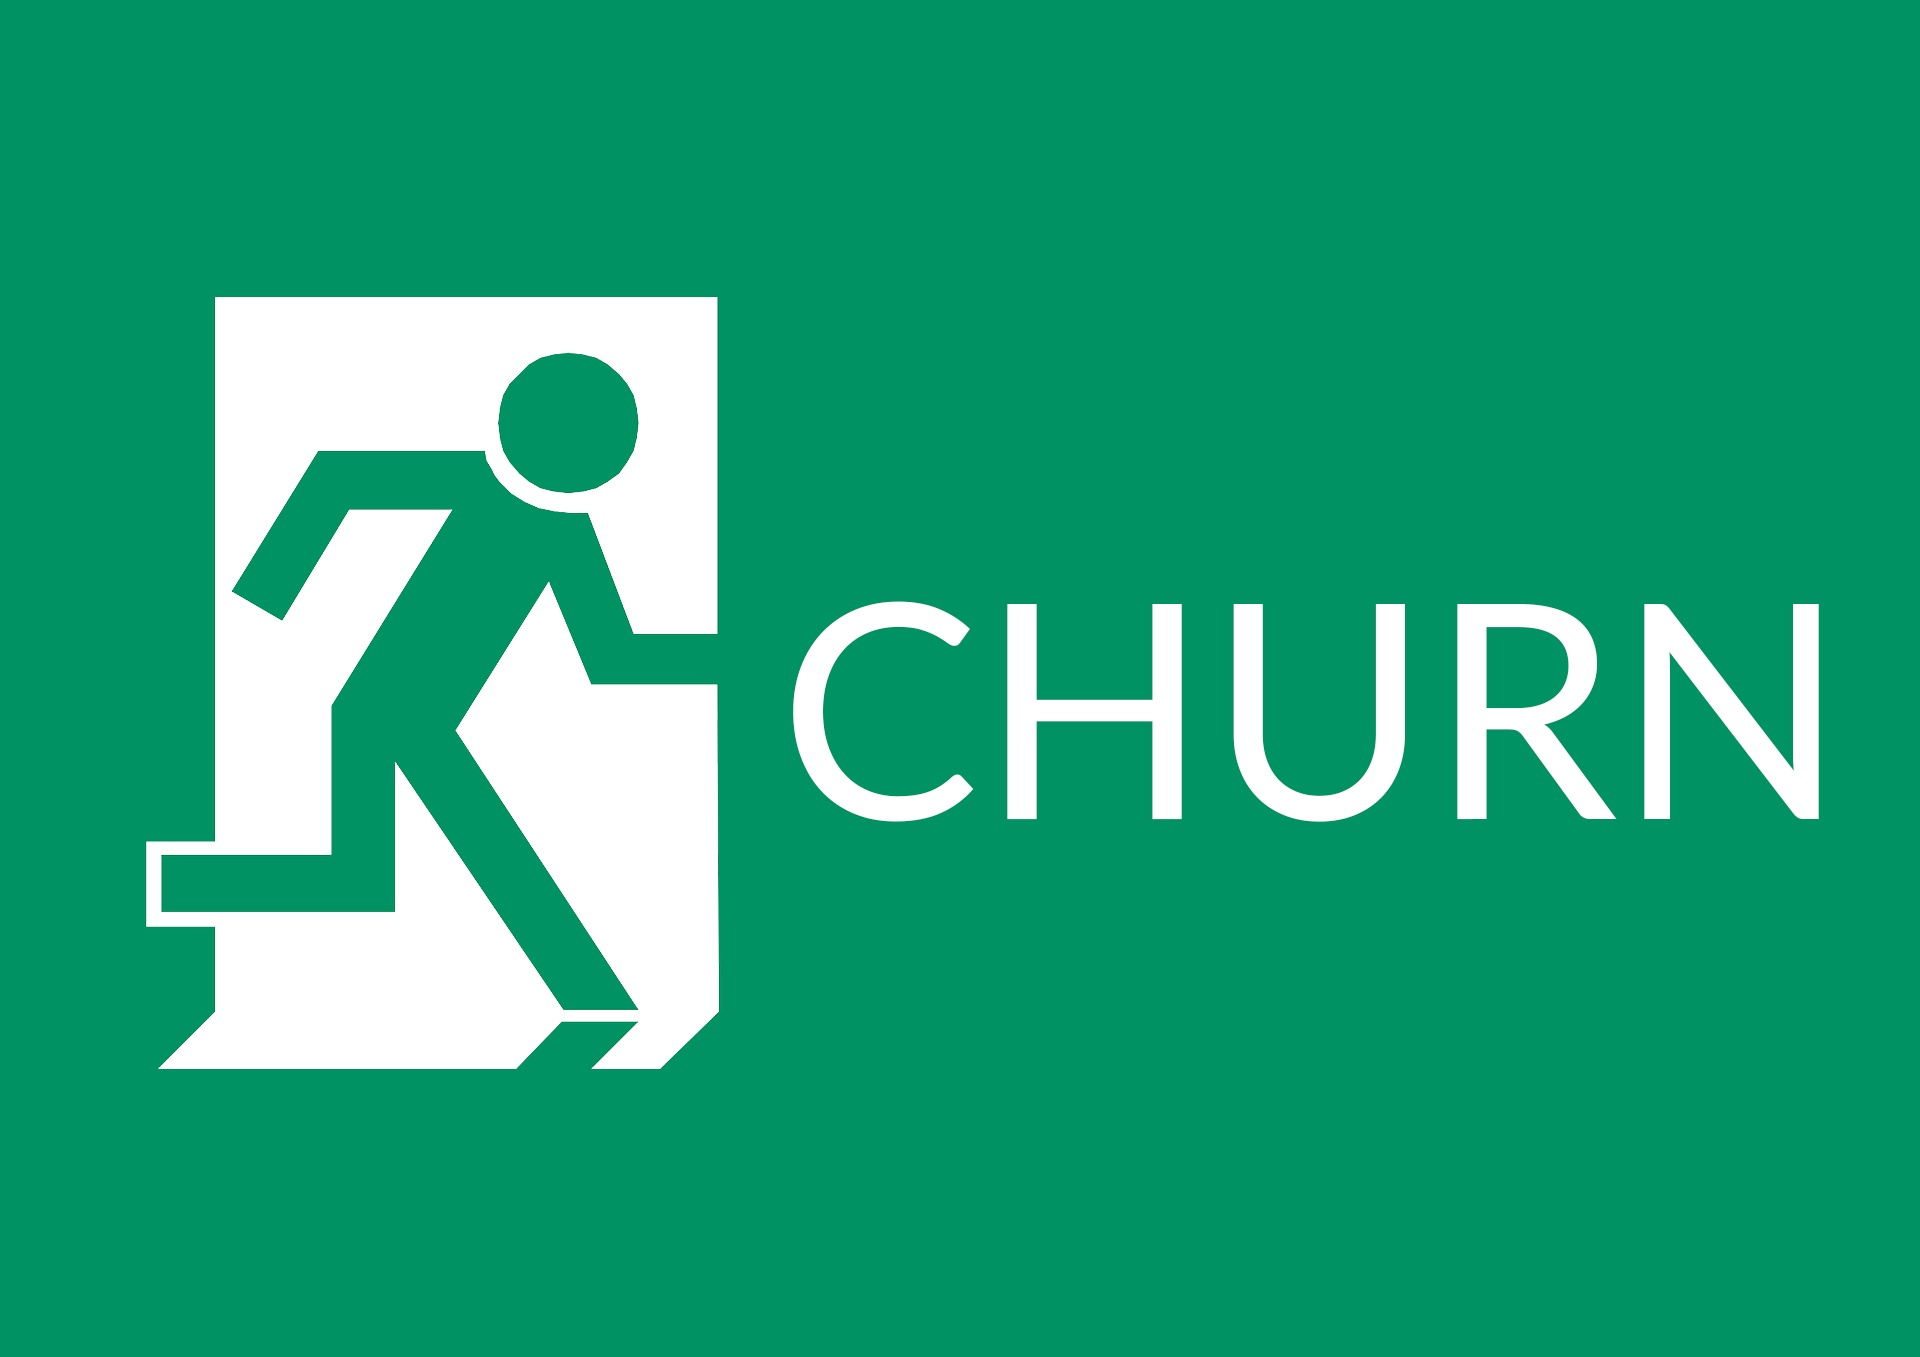

Como podremos saber, una empresa vende un producto o presta un servicio a sus clientes y de esto obtiene dinero, cumpliendo su objetivo principal el cual es generar ganancias.

Por ello, este proyecto aputanara a uno de los componentes mas importantes de una empresa que son los clientes. Mas especificamente, analizaremos el abandono de los mismos, o mas conocido como customer chrun en ingles. 

Utilizaremos un dataset brindando por un banco anonimo, con datos de su cartera de clientes. Como podremos observar el customer churn rate o taza de abandono de clientes es bastante elevado 

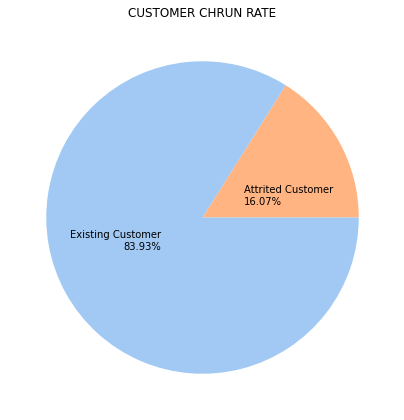

In [92]:
client_count = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).count()
plt.subplots(figsize = (7,9))
plt.title("CUSTOMER CHRUN RATE")
plt.pie(client_count,
        labels = [client_count.index[0] + "\n" + (str(round((client_count[0]/(client_count[1]+client_count[0]))*100,2))) + "%",
                  client_count.index[1]+ "\n" + (str(round((client_count[1]/(client_count[1]+client_count[0]))*100,2))) + "%"],
        colors = (sns.color_palette('pastel')[1],sns.color_palette('pastel')[0]),
        labeldistance=0.3)

plt.show()

Esto quiere decir que desde el año anterior a dia de hoy el banco perdio un 16,07% de sus clientes. 

# 1- OBJETIVOS

**Objetivos principales**

- Descubrir la causa por la cual hay deserción de clientes en las tarjetas de crédito
-Pronosticar cuales son los posibles clientes que abandonaran las tarjetas de crédito

**Objetivos secuendarios**

- Determinar que Modelo se adapta de mejor manera a las necesidades del problema
- Utilizar modelo para predecir grupos de clientes que abandonarian el banco
- Testear modelos generados

# 2-Contexto comercial

El Gerente comercial de un banco se encuentra frente a una cartera de tarjetas de crédito y detecta la deserción de clientes. Quieren analizar los datos para descubrir la razón detrás de esto y aprovechar lo mismo para predecir los clientes que probablemente abandonarán para poder tomar medidas sobre esto.

# 3- Problema comercial

### Hipótesis 1
H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

### Hipótesis 2


H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **igual** para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es **diferente** para clientes activos y retirados

## Hipótesis 3

H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es **igual** para clientes activos y retirados 

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es **diferente** para clientes activos y retirados

## Pregunta 1
 ¿Cúal es el género que más abandona la tarjeta de crédito?

## Pregunta 2
 Los que abandonan la tarjeta de crédito, ¿Cúal es su estado civil?

## Pregunta 3
 ¿Que edades promedio tienen las personas que abandonan las tarjetas de crédito?

## Pregunta 4
¿Cuanto tiempo en promedio llevan las tarjetas sin utilizar de las personas que abandonan la tarjeta de crédito?



# 4- Glosario



**Diccionario de Variables**

CLIENTNUM Client number. Unique identifier for the customer holding the account

Attrition_FlagInternal event (customer activity) variable - if the account is closed then 1 else 0

Customer_Age Demographic variable - Customer's Age in Years

Gender Demographic variable - M=Male, F=Female

Dependent_count Demographic variable - Number of dependents

Education_Level Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

Marital_Status Demographic variable - Married, Single, Divorced, Unknown

Income_Category Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, $60K - 80K, 80K-120K, > 120K, Unknown)

Card_Category Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

Months_on_book Period of relationship with bank

Total_Relationship_Count Total no. of products held by the customer

Months_Inactive_12_mon No. of months inactive in the last 12 months

Contacts_Count_12_mon No. of Contacts in the last 12 months

Credit_Limit Credit Limit on the Credit Card

Total_Revolving_Bal Total Revolving Balance on the Credit Card

Avg_Open_To_Buy Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1 Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt Total Transaction Amount (Last 12 months)

Total_Trans_Ct Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1 Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio Average Card Utilization Ratio


In [74]:
bank_df = bank_df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])

# 5-Análisis Exploratorio de Datos (EDA)

In [76]:
columns_name = list(bank_df.columns.values)  
#  Se arma una lista con los nombres de las columnas para usarla a continuacion

**Se realiza una serie de histogramas para cada una de las columnas con el objetivo de ver si se puede apreciar algun patrón interesante a ser analizado. Como el objetivo de este analisis es predecir el "Attrition_Flag" se realizo una agrupacon por esta categoria.**

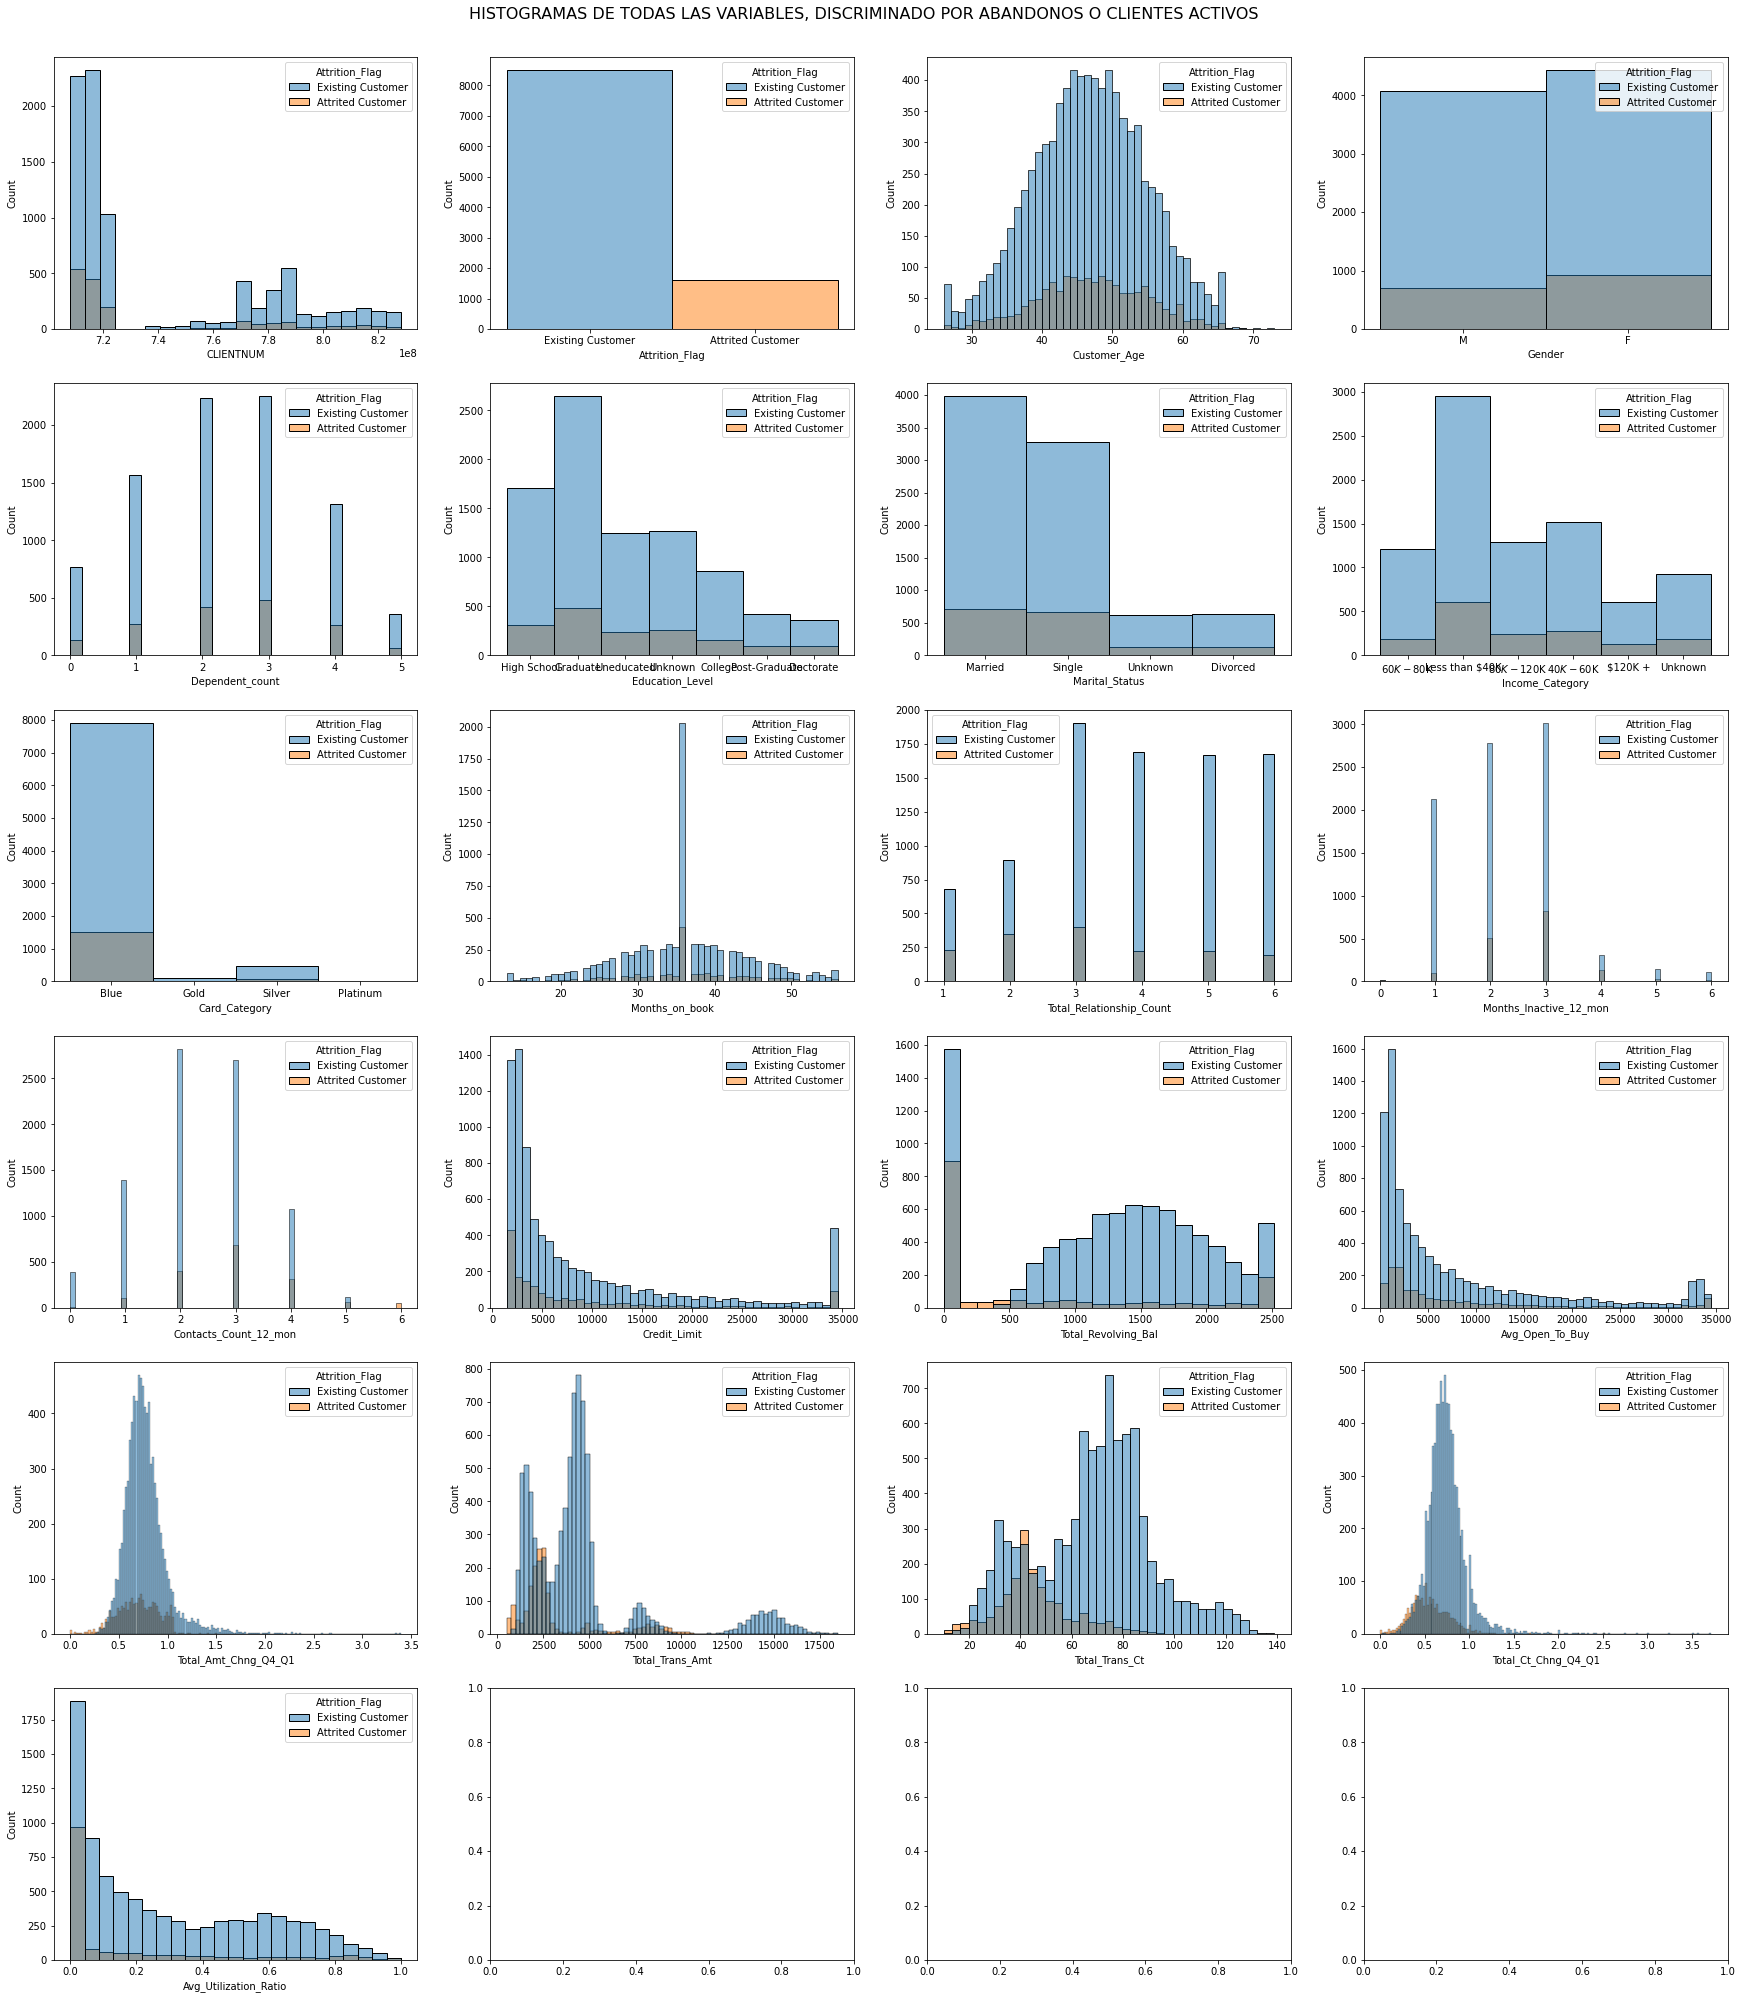

In [83]:
fig , axes = plt.subplots(6,4,figsize = (30,35))
plt.suptitle('HISTOGRAMAS DE TODAS LAS VARIABLES, DISCRIMINADO POR ABANDONOS O CLIENTES ACTIVOS',fontsize=16,y = 0.9)
i = 0
for fil in range(6):
  for col in range(4):
    if i <=20:                     #esta condicion se plantea ya que las ultimas 2 columnas del dataset no hay que usarlas para analisi segun la pagina
        sns.histplot(data=bank_df,
              ax=axes[fil,col],
              x=columns_name[i],
              hue = 'Attrition_Flag'
              )
        i = i + 1
plt.show()

## Análisis de las hipótesis planteadas



### Hipótesis 1


H1 = La media del monto total de transacciones (Total_Trans_Amt) es igual para clientes activos y retirados

H0 = La media del monto total de transacciones (Total_Trans_Amt) es diferente para clientes activos y retirados

In [108]:
Retirados = bank_df['Attrition_Flag'] == "Attrited Customer" 
Activos = bank_df['Attrition_Flag'] != "Attrited Customer" 
print("Media de montos de transferencia de clientes ACTIVOS" ,bank_df[Activos].Total_Trans_Amt.mean())  # Mediana de clientes activos
print("Media de montos de transferencias de clientes INACTIVOS" ,bank_df[Retirados].Total_Trans_Amt.mean()) # Mediana de clientes retirados

Media de montos de transferencia de clientes ACTIVOS 4654.655882352941
Media de montos de transferencias de clientes INACTIVOS 3095.025814382299


Analisis de la media con groupby

In [111]:
media_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).mean()
sum_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).sum()

In [113]:
media_tta[0]

3095.025814382299

In [ ]:
print('media del monto total de transacciones por Attrition Flag')
print(media_tta)
print('_ '*30)
print(' ')
print('suma del monto total de transacciones por Attrition Flag')
print(sum_tta)

media del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    3095.025814
Existing Customer    4654.655882
Name: Total_Trans_Amt, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     5035607
Existing Customer    39564575
Name: Total_Trans_Amt, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H1 y se validaria la H0.

En función de esto, se procede a analizar mas a detalle. Para ello se realizan 2 graficos, un histograma y un boxplot con el objetivo de determinar que tipo de distribucion siguen los datos y para determinar la existencia de outliers. En caso de que se encuentren outliers la media no es una medida muy representativa, por lo que se analizara con la mediana.

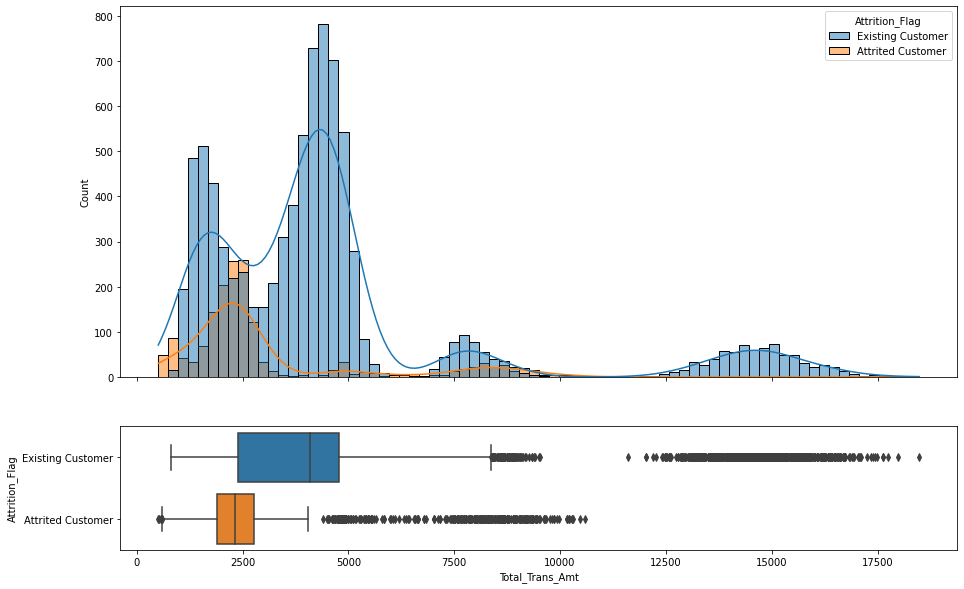

In [141]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Amt",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Amt",
            y = "Attrition_Flag"
            )
plt.show()

Se observa gran cantidad de outliers, por lo que se analizara la mediana.

In [ ]:
print("Mediana de montos de transferencia de clientes ACTIVOS" ,bank_df[Activos].Total_Trans_Amt.median())  # Mediana de clientes activos
print("Mediana de montos de transferencias de clientes INACTIVOS" ,bank_df[Retirados].Total_Trans_Amt.median()) # Mediana de clientes retirados

Mediana de montos de transferencia de clientes ACTIVOS 4100.0
Mediana de montos de transferencias de clientes INACTIVOS 2329.0


In [ ]:
bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.median() # LO MISMO PERO EN UNA SOLA LINEA

2329.0

Analisis de la mediana con groupby

In [ ]:
mediana_tta = bank_df['Total_Trans_Amt'].groupby(bank_df['Attrition_Flag']).median()

In [ ]:
print('mediana del monto total de transacciones por Attrition Flag')
print(mediana_tta)

mediana del monto total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    2329.0
Existing Customer    4100.0
Name: Total_Trans_Amt, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR 
Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Amt.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  1903.5
Q3R =  2772.0
IQR Retirados =  868.5
Q1A =  2384.75
Q3A =  4781.25
IQR Activos =  2396.5


Podemos observar que los montos de las transferencias realizadas por clientes activos se concentran entre los 2384 y 4781 USD. Mientras que los montos de las transferencias realizadas por clientes retirados se encuentran entre los 1903 y 2772 USD

### Hipótesis 2



H2 = La media de la cantidad total de transacciones (Total_Trans_Ct) es igual para clientes activos y retirados

H0 = La media de la cantidad total de transacciones (Total_Trans_Ct) es diferente para clientes activos y retirados



In [ ]:
print("Media de cantidad de transferencia de clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.mean())
print("Media de cantidad de transferencias de clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.mean())

Media de cantidad de transferencia de clientes ACTIVOS 68.67258823529411
Media de cantidad de transferencias de clientes INACTIVOS 44.93362015980332


Analisis de la media con groupby

In [ ]:
media_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).mean()
sum_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).sum()

In [ ]:
print('media del conteo total de transacciones por Attrition Flag')
print(media_ttc)
print('_ '*30)
print(' ')
print('suma del conteo total de transacciones por Attrition Flag')
print(sum_ttc)

media del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    44.933620
Existing Customer    68.672588
Name: Total_Trans_Ct, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
suma del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer     73107
Existing Customer    583717
Name: Total_Trans_Ct, dtype: int64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H2 y se validaria la H0.

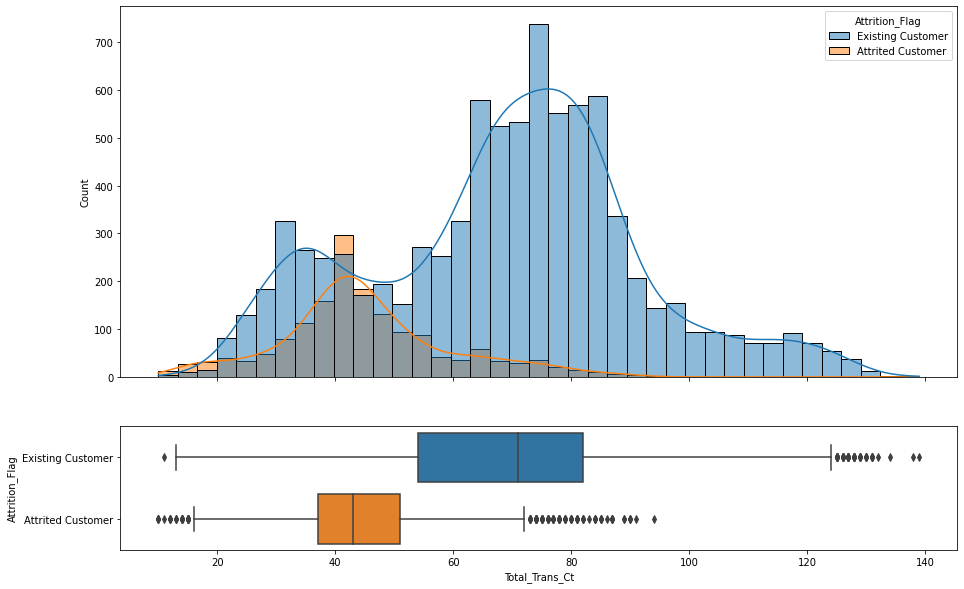

In [139]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Trans_Ct",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Trans_Ct",
            y = "Attrition_Flag"
            )
plt.show()

In [ ]:
print("Mediana de cantidad de transferencia de clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.median())  # Mediana de clientes activos
print("Mediana de cantidad de transferencias de clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.median()) # Mediana de clientes retirados

Mediana de cantidad de transferencia de clientes ACTIVOS 71.0
Mediana de cantidad de transferencias de clientes INACTIVOS 43.0


Analisis de la mediana con groupby

In [ ]:
mediana_ttc = bank_df['Total_Trans_Ct'].groupby(bank_df['Attrition_Flag']).median()

In [ ]:
print('Mediana del conteo total de transacciones por Attrition Flag')
print(mediana_ttc)

Mediana del conteo total de transacciones por Attrition Flag
Attrition_Flag
Attrited Customer    43.0
Existing Customer    71.0
Name: Total_Trans_Ct, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Trans_Ct.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  37.0
Q3R =  51.0
IQR Retirados =  14.0
Q1A =  54.0
Q3A =  82.0
IQR Activos =  28.0


Podemos observar que la cantiad de transferencias realizada por clientes activos se encunentra entre 54 y 82. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 37 y 51.

### Hipótesis 3


H3 = La media de la variacion en cantidad de transacciones Q4 -Q1 (1) es igual para clientes activos y retirados

H0 = La media de la variacion en cantidad de transacciones Q4 -Q1 (Total_Ct_Chng_Q4_Q1) es diferente para clientes activos y retirados

In [ ]:
print("Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.mean())
print("Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.mean())

Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS 0.7424341176470589
Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS 0.5543859864781807


Analisis de la media con groupby

In [ ]:
media_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).mean()
sum_tcc_Q4Q1 = bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).sum()

In [ ]:
print('Media de cantidad de transferencias realizadas por Attrition Flag')
print(media_tcc_Q4Q1)
print('_ '*33)
print(' ')
print('Suma de cantidad de transferencias realizadas por Attrition Flag')
print(sum_tcc_Q4Q1)

Media de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.554386
Existing Customer    0.742434
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
 
Suma de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer     901.986
Existing Customer    6310.690
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Se nota que los valores de las medias son diferentes. Por lo que se descarta la H3 y se validaria la H0.

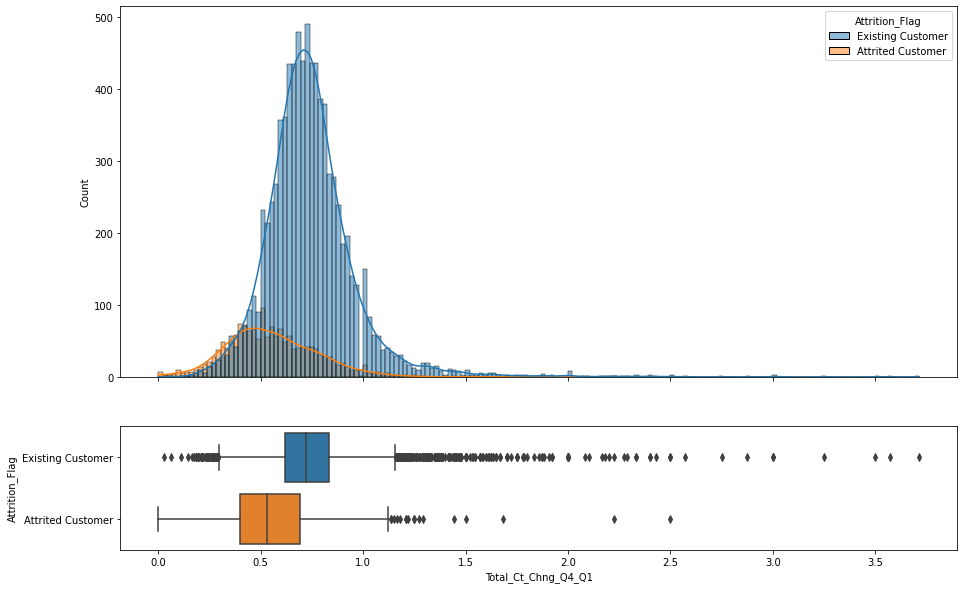

In [144]:
fig,axes = plt.subplots(2,1,figsize=(15,10),
                        sharex = True,
                        gridspec_kw={'height_ratios':[3,1]})
sns.histplot(ax = axes[0],
             data  =bank_df,
             x = "Total_Ct_Chng_Q4_Q1",
             hue = "Attrition_Flag",
             kde = True
             )
sns.boxplot(ax = axes[1],
            data = bank_df,
            x = "Total_Ct_Chng_Q4_Q1",
            y = "Attrition_Flag"
            )
plt.show()

In [ ]:
print("Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS" ,bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.median())
print("Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS" ,bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.median())

Media de la variacion de cantidad de transferencias realizadas por clientes ACTIVOS 0.721
Media de la variacion de cantidad de transferencias realizadas por clientes INACTIVOS 0.531


Analisis de la mediana con groupby

In [ ]:
mediana_tcc_Q4Q1= bank_df['Total_Ct_Chng_Q4_Q1'].groupby(bank_df['Attrition_Flag']).median()

In [ ]:
print('Mediana de cantidad de transferencias realizadas por Attrition Flag')
print(mediana_tcc_Q4Q1)

Mediana de cantidad de transferencias realizadas por Attrition Flag
Attrition_Flag
Attrited Customer    0.531
Existing Customer    0.721
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


Ahora se calculan los Q1 y Q3 para sacar el IQR Vamos a usar una A para referirnos a los clientes ACTIVOS y una R para los clientes RETIRADOS

In [ ]:
Q3R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
Q1R = bank_df[bank_df['Attrition_Flag'] == "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
print("Q1R = ",Q1R)
print("Q3R = ",Q3R)
print("IQR Retirados = ", Q3R-Q1R)

Q1A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.25)
Q3A = bank_df[bank_df['Attrition_Flag'] != "Attrited Customer"].Total_Ct_Chng_Q4_Q1.quantile(0.75)
print("Q1A = ",Q1A)
print("Q3A = ",Q3A)
print("IQR Activos = ", Q3A-Q1A)

Q1R =  0.4
Q3R =  0.692
IQR Retirados =  0.2919999999999999
Q1A =  0.617
Q3A =  0.833
IQR Activos =  0.21599999999999997


Podemos observar que la variación de la cantidad de transferencias realizadas por clientes activos se encuentra entre 0,61 y 0,833. Mientras que la cantidad de transferencias realizadas por clientes retirados se concentra entre 0,4 y 0,692..

## Correlación de variables

Se procede a realizar una matriz de correlación para poder determinar si existe o no una relación entre las diferentes variables

Para evitar confusion en los datos, se hace la matriz de correlacion pero con los valores absoltuos. De esta forma, todos los coeficientes seran positivos.

In [ ]:
bank_df.corr().abs()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,0.019692,0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,0.122254,0.788912,0.010931,0.054361,0.018452,0.002476,0.014780,0.001151,0.062042,0.046446,0.067097,0.012143,0.007114
Dependent_count,0.006772,0.122254,1.000000,0.103062,0.039076,0.010768,0.040505,0.068065,0.002688,0.068291,0.035439,0.025046,0.049912,0.011087,0.037135
Months_on_book,0.134588,0.788912,0.103062,1.000000,0.009203,0.074164,0.010774,0.007507,0.008623,0.006732,0.048959,0.038591,0.049819,0.014072,0.007541
Total_Relationship_Count,0.006907,0.010931,0.039076,0.009203,1.000000,0.003675,0.055203,0.071386,0.013726,0.072601,0.050119,0.347229,0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,0.010768,0.074164,0.003675,1.000000,0.029493,0.020394,0.042210,0.016605,0.032247,0.036982,0.042787,0.038989,0.007503
Contacts_Count_12_mon,0.005694,0.018452,0.040505,0.010774,0.055203,0.029493,1.000000,0.020817,0.053913,0.025646,0.024445,0.112774,0.152213,0.094997,0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,0.071386,0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,0.002020,0.482965
Total_Revolving_Bal,0.000825,0.014780,0.002688,0.008623,0.013726,0.042210,0.053913,0.042493,1.000000,0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,0.072601,0.016605,0.025646,0.995981,0.047167,1.000000,0.007595,0.165923,0.070885,0.010076,0.538808


Podemos observar que la matriz de correlacion solo se calcula sobre valores numericos. Los valores categoricos fueron quitados de los datos de forma automatica.

Visualmente en el dataset, es dificil determinar si existe o no una relación entre las variables, por lo que se procede a graficarla.

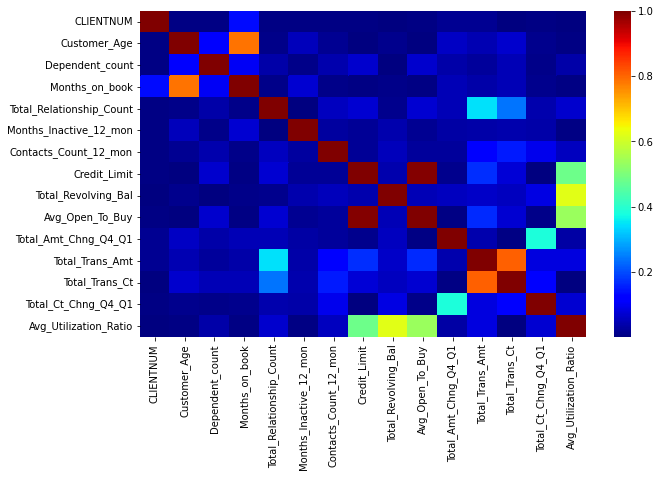

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data=bank_df.corr().abs(), cmap='jet')

In [ ]:
bank_df.corr().abs().unstack()

CLIENTNUM              CLIENTNUM                   1.000000
                       Customer_Age                0.007613
                       Dependent_count             0.006772
                       Months_on_book              0.134588
                       Total_Relationship_Count    0.006907
                                                     ...   
Avg_Utilization_Ratio  Total_Amt_Chng_Q4_Q1        0.035235
                       Total_Trans_Amt             0.083034
                       Total_Trans_Ct              0.002838
                       Total_Ct_Chng_Q4_Q1         0.074143
                       Avg_Utilization_Ratio       1.000000
Length: 225, dtype: float64

Se puede obvservar que en la matriz de correlación faltan algunas variables. Esto se debe a lo explicado anteriormente, ya que no considera variables categoricas

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

Tal y como se planteo unos pasos mas arriba, tenemos valores categoricos o del tipo "object" por lo que no podremos sacar mayores conclusiones sin antes quitarlos.

In [ ]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [ ]:
df = bank_df.drop(columns=['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag'])   
# Aqui quitamos todas las columnas categoricas

In [ ]:
df.head()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
parejas(df)

{('Avg_Open_To_Buy', 'Avg_Open_To_Buy'),
 ('Avg_Open_To_Buy', 'CLIENTNUM'),
 ('Avg_Open_To_Buy', 'Contacts_Count_12_mon'),
 ('Avg_Open_To_Buy', 'Credit_Limit'),
 ('Avg_Open_To_Buy', 'Customer_Age'),
 ('Avg_Open_To_Buy', 'Dependent_count'),
 ('Avg_Open_To_Buy', 'Months_Inactive_12_mon'),
 ('Avg_Open_To_Buy', 'Months_on_book'),
 ('Avg_Open_To_Buy', 'Total_Relationship_Count'),
 ('Avg_Open_To_Buy', 'Total_Revolving_Bal'),
 ('Avg_Utilization_Ratio', 'Avg_Open_To_Buy'),
 ('Avg_Utilization_Ratio', 'Avg_Utilization_Ratio'),
 ('Avg_Utilization_Ratio', 'CLIENTNUM'),
 ('Avg_Utilization_Ratio', 'Contacts_Count_12_mon'),
 ('Avg_Utilization_Ratio', 'Credit_Limit'),
 ('Avg_Utilization_Ratio', 'Customer_Age'),
 ('Avg_Utilization_Ratio', 'Dependent_count'),
 ('Avg_Utilization_Ratio', 'Months_Inactive_12_mon'),
 ('Avg_Utilization_Ratio', 'Months_on_book'),
 ('Avg_Utilization_Ratio', 'Total_Amt_Chng_Q4_Q1'),
 ('Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1'),
 ('Avg_Utilization_Ratio', 'Total_Relationshi

In [ ]:
correlaciones(df,10)

Credit_Limit              Avg_Open_To_Buy          0.995981
Total_Trans_Amt           Total_Trans_Ct           0.807192
Customer_Age              Months_on_book           0.788912
Total_Revolving_Bal       Avg_Utilization_Ratio    0.624022
Avg_Open_To_Buy           Avg_Utilization_Ratio    0.538808
Credit_Limit              Avg_Utilization_Ratio    0.482965
Total_Amt_Chng_Q4_Q1      Total_Ct_Chng_Q4_Q1      0.384189
Total_Relationship_Count  Total_Trans_Amt          0.347229
                          Total_Trans_Ct           0.241891
Credit_Limit              Total_Trans_Amt          0.171730
dtype: float64

Las unicas relaciones que podemos notar como importantes gracias a la matriz son las siguientes

Credit_Limit / Avg_Open_To_Buy = 0.995981

Total_Trans_Amt / Total_Trans_Ct = 0.807192

Customer_Age / Months_on_book = 0.788912

Total_Revolving_Bal / Avg_Utilization_Ratio = 0.624022

## Analisis de variables categoricas

Vamos a hacer un analisis de los valores tipo object de forma manual pero solo en funcion de la variable target denominada Attrition_Flag


In [ ]:
card_category_count = bank_df['Card_Category'].value_counts()
marital_statuts_count = bank_df['Marital_Status'].value_counts()
education_level_count = bank_df['Education_Level'].value_counts()
gender_count = bank_df['Gender'].value_counts()
atf_count = bank_df['Attrition_Flag'].value_counts()

print('Card_category_count \n',card_category_count,'\n','- '*20)
print('Marital_statuts_count \n',marital_statuts_count,'\n','- '*20)
print('Education_level_count \n',education_level_count,'\n','- '*20)
print('Gender_count \n',gender_count,'\n','- '*20)
print('Attrition_Flag_count \n',atf_count,'\n')

Card_category_count 
 Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64 
 - - - - - - - - - - - - - - - - - - - - 
Marital_statuts_count 
 Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64 
 - - - - - - - - - - - - - - - - - - - - 
Education_level_count 
 Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64 
 - - - - - - - - - - - - - - - - - - - - 
Gender_count 
 F    5358
M    4769
Name: Gender, dtype: int64 
 - - - - - - - - - - - - - - - - - - - - 
Attrition_Flag_count 
 Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64 



In [146]:
cuenta_tipo_tarjeta = bank_df['Attrition_Flag'].groupby(bank_df['Card_Category']).value_counts().unstack()
cuenta_tipo_tarjeta['%_out'] = cuenta_tipo_tarjeta['Attrited Customer'] / (cuenta_tipo_tarjeta['Attrited Customer'] + cuenta_tipo_tarjeta['Existing Customer'])
cuenta_tipo_tarjeta

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Card_Category,,,
Blue,1519,7917,0.160979
Gold,21,95,0.181034
Platinum,5,15,0.250000
Silver,82,473,0.147748


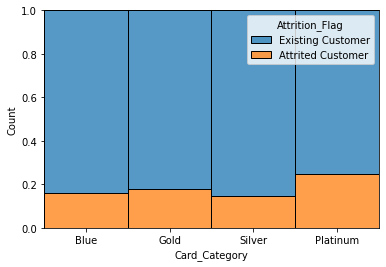

In [192]:
ax = sns.histplot(bank_df,
             x = 'Card_Category',
             hue ='Attrition_Flag',
             multiple = 'fill',
             stat = 'count')
plt.show()

In [182]:
cuenta_marital_status = bank_df['Attrition_Flag'].groupby(bank_df['Marital_Status']).value_counts().unstack()
cuenta_marital_status['%_out'] = cuenta_marital_status['Attrited Customer'] / (cuenta_marital_status['Attrited Customer'] + cuenta_marital_status['Existing Customer'])
cuenta_marital_status

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Marital_Status,,,
Divorced,121,627,0.161765
Married,709,3978,0.151269
Single,668,3275,0.169414
Unknown,129,620,0.172230


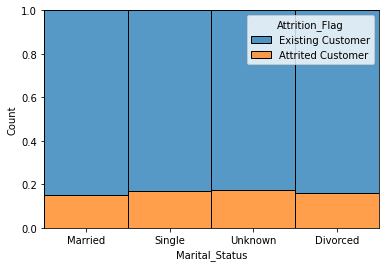

In [165]:
sns.histplot(bank_df,
             x = 'Marital_Status',
             hue ='Attrition_Flag',
             multiple = 'fill')
plt.show()

In [ ]:
cuenta_Education_level = bank_df['Attrition_Flag'].groupby(bank_df['Education_Level']).value_counts().unstack()
cuenta_Education_level['%_out'] = cuenta_Education_level['Attrited Customer'] / (cuenta_Education_level['Attrited Customer'] + cuenta_Education_level['Existing Customer'])
cuenta_Education_level

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Education_Level,,,
College,154,859,0.152024
Doctorate,95,356,0.210643
Graduate,487,2641,0.155691
High School,306,1707,0.152012
Post-Graduate,92,424,0.178295
Uneducated,237,1250,0.159381
Unknown,256,1263,0.168532


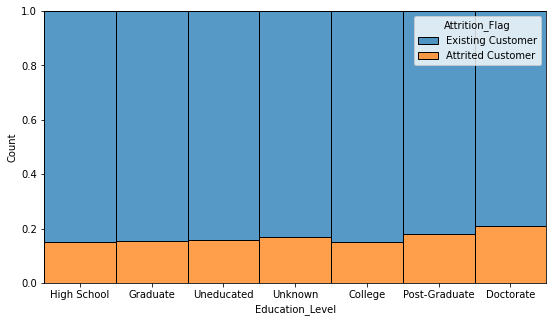

In [163]:
plt.subplots(figsize = (9,5))
sns.histplot(bank_df,
             x = 'Education_Level',
             hue ='Attrition_Flag',
             multiple = 'fill')
plt.show()

In [ ]:
cuenta_Gender = bank_df['Attrition_Flag'].groupby(bank_df['Gender']).value_counts().unstack()
cuenta_Gender['%_out'] = cuenta_Gender['Attrited Customer'] / (cuenta_Gender['Attrited Customer'] + cuenta_Gender['Existing Customer'])
cuenta_Gender

Attrition_Flag,Attrited Customer,Existing Customer,%_out
Gender,,,
F,930,4428,0.173572
M,697,4072,0.146152


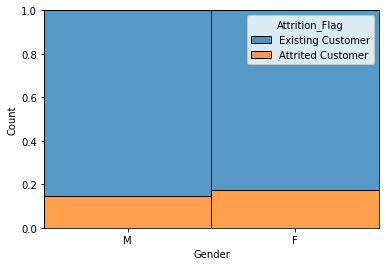

In [168]:
sns.histplot(bank_df,
             x = 'Gender',
             hue ='Attrition_Flag',
             multiple = 'fill')
plt.show()

De este analisis de variables categorias podemos sacar las siguientes conclusiones:

- Card_Category:  Existe una mayor cantidad de clientes tipo "Platinum" que dejan de usar los servicios.
- Marital_Status: No hay diferencias significativas en el abandono de clientes segun esta categoria.
- Education_Level: Existe una mayor cantidad de clientes con un nivel de educacion "Doctorate" que dejan de usar los servicios.
- Gender: No hay diferencias significativas en el abandono de clientes segun esta categoria

In [ ]:
print('Porcentaje promedio de clientes que abandonan segun Card_Category')
print(cuenta_tipo_tarjeta['%_out'].mean()*100 ,'%')
print('Porcentaje de clientes segun categoria Platinum que abandonan los servicios')
print(cuenta_tipo_tarjeta['%_out']['Platinum']*100,'%')
print('Diferencia')
print((cuenta_tipo_tarjeta['%_out']['Platinum'] - cuenta_tipo_tarjeta['%_out'].mean())*100,'%' )
print('- '*42)
print('Porcentaje promedio de clientes que abandonan segun categoria Education_Level')
print(cuenta_Education_level['%_out'].mean()*100 ,'%')
print('Porcentaje de clientes con nivel de educacion Doctorate que abandonan los servicios')
print(cuenta_Education_level['%_out']['Doctorate']*100,'%')
print('Diferencia')
print((cuenta_Education_level['%_out']['Doctorate'] - cuenta_Education_level['%_out'].mean())*100,'%' )

Porcentaje promedio de clientes que abandonan segun Card_Category
18.494036474825382 %
Porcentaje de clientes segun categoria Platinum que abandonan los servicios
25.0 %
Diferencia
6.505963525174618 %
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Porcentaje promedio de clientes que abandonan segun categoria Education_Level
16.80824248996223 %
Porcentaje de clientes con nivel de educacion Doctorate que abandonan los servicios
21.06430155210643 %
Diferencia
4.256059062144199 %


## Prueba de modelos

Para empezar a probar modelos y evaluar su desempeño es necesario realizar algunas transformaciones en nuestros datos. Ya que tenemos muchas variables categoricas que no pueden ser analizadas por los modelos.

Debido a esto, se aplicaran tecnicas para codificar estas variables categoricas como puede ser un Label Encoder o dummy


In [ ]:
df_e2 = bank_df
# total de columnas categoricas ['Card_Category','Marital_Status','Income_Category','Education_Level','Gender','Attrition_Flag']
lista = ['Marital_Status','Gender'] # lista de columnas categoricas a codificar con LE
lista2 = ['Card_Category','Income_Category','Education_Level','Attrition_Flag'] # lista de columnas categoricas a codificar con OHE o dummy

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for i in lista:
  df_e2[i+'_cat'] = labelencoder.fit_transform(df_e2[i]) # creo una nueva columna con el nombre de la columna categorica anterior + _cat para la codificacion
df_e2 = df_e2.drop(columns=lista) # creo un nuevo df eliminando las columnas categoricas, dejando en su lugar las columnas codificadas

df_e2 = pd.get_dummies(df_e2, columns = lista2)


Le cambio el nombre a la columna Attrition_Flag_Attrited Customer por Target y eliminamos las columnas que no son utiles para el analisis. Por ejemplo la columna Attrition_Flag_Existing Customer que es inversa a nuestro Target.
Por otro lado tambien elminiamos la columna CLIENTNUM que es un ID de cliente que no aporta informacion al modelo. 

In [ ]:
df_e2 = df_e2.rename(columns={'Attrition_Flag_Attrited Customer':'Target'})
df_e2 = df_e2.drop(columns=['Attrition_Flag_Existing Customer','CLIENTNUM'])

In [ ]:
df_e2['Target'].value_counts()
# En este paso, podemos ver que la columna de Target tiene 8500 valores = 0 que son los que corresponden a Existing Customer, y los otros 1627 = 1 corresponden a los Attrited Customer

0    8500
1    1627
Name: Target, dtype: int64

Dividimos nuestros datos en X e y.

In [ ]:
X = df_e2.drop(columns=['Target'])
y = df_e2['Target']    

In [ ]:
from sklearn.model_selection import train_test_split
#se carga la libreria para poder dividir la información en entrenamiento(es la mayor parte del dataset) y prueba (sobre esto vamos a testear el módelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 42)

### Prueba 1: AgglomerativeClustering



Prueba de modelo AgglomerativeClustering para cluster

Faltaria hacer un train & test. (recordar armar los conjuntos de train y test por separado). Ver metricas para analizar efectividad del modelo.

La ejecucion con solo 2 columnas demora como 5 minutos si no quitamos el grafico

Sin el grafico, se ejecuta en 2 segundos

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
# plt.figure(figsize=(10,6))
# dendrogram = sch.dendrogram(sch.linkage(X_train, method='ward'))
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(X_train)
y_pred_AC = model.fit_predict(X_test)
# labels = model.labels_
# plt.scatter(X_train[labels==0, 0], X_train[labels==0, 1], s=50, marker='o', color='red')
# plt.scatter(X_train[labels==1, 0], X_train[labels==1, 1], s=50, marker='o', color='blue')
# plt.scatter(X_train[labels==2, 0], X_train[labels==2, 1], s=50, marker='o', color='green')
# plt.scatter(X_train[labels==3, 0], X_train[labels==3, 1], s=50, marker='o', color='purple')
# plt.scatter(X_train[labels==4, 0], X_train[labels==4, 1], s=50, marker='o', color='orange')
# plt.show()

In [ ]:
print('\n\nclassification_report\n\n',classification_report(y_test, y_pred_AC))



classification_report

               precision    recall  f1-score   support

           0       0.84      0.10      0.18      2113
           1       0.17      0.63      0.27       419
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.19      2532
   macro avg       0.20      0.15      0.09      2532
weighted avg       0.73      0.19      0.19      2532



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Prueba 2: Regresion logistica


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
model = LogisticRegression(max_iter=800, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
predicciones = model.predict(X_test)

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, predicciones))
print('recall_score\n',recall_score(y_test, predicciones))
print('precision_score\n',precision_score(y_test, predicciones))
print('f1_score\n',f1_score(y_test, predicciones))
print('\n\nclassification_report\n\n',classification_report(y_test, predicciones))

accuracy_score
 0.8906003159557662
recall_score
 0.49403341288782815
precision_score
 0.7610294117647058
f1_score
 0.5991316931982634


classification_report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.76      0.49      0.60       419

    accuracy                           0.89      2532
   macro avg       0.83      0.73      0.77      2532
weighted avg       0.88      0.89      0.88      2532



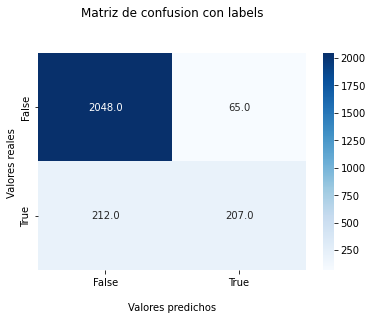

In [ ]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Haremos una validaion cruzada para determinar si el modelo esta balanceado o no 

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(model,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='precision',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

In [ ]:
print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.7421618706465372
0.7509501698216342


En cuanto a la precision el modelo pareceria estar balanceado. Ya que la media de la precision de cada uno de los modelos analizados es muy parecida a la media de la precision de las predicciones. 

In [ ]:
kfcv_recall =  cross_validate(model,                  # Indicamos el modelo
                              X_train,                 # Le pasamos los features de entrenamiento 
                              y_train,                 # Le pasamos la columna target de entrenamiento
                              scoring='recall',        # Declaramos que metrica deseamos darle seguimiento
                              return_train_score=True, # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                              cv=skf                   # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                              )
print(kfcv_recall['train_score'].mean())
print(kfcv_recall['test_score'].mean())

0.5264961107863855
0.5322622680978017


Para el recall tambien obtenemos resultados balanceados.

Sin embargo, el modelo ofrece valores un tanto bajos para el recall y presicion de la variable target. Por lo que se procedera a hacer un tuneo de hiperparametros con el fin de ajustar un poco mas el modelo. 

#### Tuneo de hiperparametros

Probamos una penalizacion L1

In [ ]:
l1_values = [0.01, 0.05, 0.1, 0.25, 0.5]
resultados_l1 = []

for valor in l1_values:
    logreg_l1 = LogisticRegression(C=valor, penalty="l1", max_iter = 500, solver = 'liblinear') 

    kfcv_precision =  cross_validate(logreg_l1,              
                                     X_train,
                                     y_train,
                                     scoring='precision',
                                     return_train_score=True,
                                     cv=skf)
    
    resultados_l1.append((valor, kfcv_precision['train_score'].mean(), kfcv_precision['test_score'].mean()))

(pd.DataFrame(resultados_l1, columns= ['valor_penalización', 'train_presicion_mean', 'test_presicion_mean'])
.sort_values(by='test_presicion_mean', ascending = False)
)

,valor_penalización,train_presicion_mean,test_presicion_mean
2,0.10,0.771615,0.769052
3,0.25,0.770326,0.768825
4,0.50,0.766008,0.764448
1,0.05,0.764573,0.758739
0,0.01,0.741222,0.745750


Por lo tanto concluimos que el mejor valor de penalización es 0,1 para mi modelo de test

Probamos una penlaizacion L2

In [ ]:
l2_values = [0.01, 0.05, 0.1, 0.25, 0.5]
resultados_l2 = []

for valor in l2_values:
    logreg_l2 = LogisticRegression(C=valor, penalty="l2", max_iter = 500, solver = 'liblinear') 

    kfcv_precision =  cross_validate(logreg_l2,              
                                     X_train,
                                     y_train,
                                     scoring='precision',
                                     return_train_score=True,
                                     cv=skf)
    
    resultados_l2.append((valor, kfcv_precision['train_score'].mean(), kfcv_precision['test_score'].mean()))

(pd.DataFrame(resultados_l2, columns= ['valor_penalización', 'train_presicion_mean', 'test_presicion_mean'])
.sort_values(by='test_presicion_mean', ascending = False)
)

,valor_penalización,train_presicion_mean,test_presicion_mean
0,0.01,0.747256,0.746256
1,0.05,0.739168,0.741864
4,0.50,0.736509,0.738893
2,0.10,0.738013,0.738801
3,0.25,0.736735,0.738634


La mejor penalizacion para el modelo evaluandolo segun su precision seria L1 con un valor de 0.1 

Evaluamos ambos modelos a travez de un classification_report

In [ ]:
logreg_l1 = LogisticRegression(C=0.1, penalty="l1", max_iter = 500, solver = 'liblinear')
logreg_l2 = LogisticRegression(C=0.01, penalty="l2", max_iter = 500, solver = 'liblinear')
logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_test)
y_pred_l2 = logreg_l2.predict(X_test)

In [ ]:
#CREAMOS REPORTES L1
print(classification_report(y_test, y_pred_l1))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.77      0.53      0.63       419

    accuracy                           0.90      2532
   macro avg       0.84      0.75      0.78      2532
weighted avg       0.89      0.90      0.89      2532



In [ ]:
#CREAMOS REPORTES L2
print(classification_report(y_test, y_pred_l2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2113
           1       0.73      0.43      0.54       419

    accuracy                           0.88      2532
   macro avg       0.81      0.70      0.74      2532
weighted avg       0.87      0.88      0.87      2532



-Desde el punto de vista del recall el L1(0,53) es mejor que el L2(0,43)

-Desde el punto de vista de precisión el L1(0,77) es mejor que el L2(0,73)

**Por lo que utilizaremos una penalizacion L1 con un valor de 0.1**

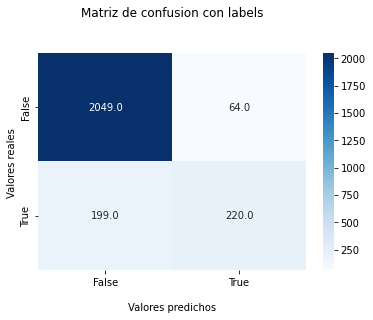

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_l1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

#### Optimizacion de hiperparametros 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.ensemble import (RandomForestClassifier, 
                              GradientBoostingClassifier, 
                              GradientBoostingRegressor)

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import ( 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report, 
    roc_auc_score,
    mean_squared_error)

from sklearn.model_selection import (
    KFold,
    cross_validate,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

In [ ]:
# # instanciamos un gbm
gbm = GradientBoostingClassifier(random_state=0)
lr = LogisticRegression(random_state=0,solver = 'liblinear')

In [ ]:
# Creamos el espacio de hiperparametros
param_grid = dict(
    n_estimators=stats.randint(50, 150),
    min_samples_split=stats.uniform(.1, .7),
    max_depth=stats.randint(2, 15)
    )
param_grid_2 = dict(
    C=stats.randint(100,1000),
    penalty=("l1","l2"), 
    max_iter = stats.randint(50,500)
    )

In [ ]:
# Create el objeto RandomizedSearchCV
rand_gbm_search = RandomizedSearchCV(gbm,
                                     param_grid,
                                     scoring='precision',
                                     cv=3,
                                     n_iter = 40, # Con este argumento indicamos cuantas muestras queremos que sean tomadas (arriba de 40 es un bune numero)
                                     random_state=10,
                                     n_jobs=-1,
                                     refit=True)

In [ ]:
# Create el objeto RandomizedSearchCV
rand_lr_search = RandomizedSearchCV(lr,
                                    param_grid_2,
                                    scoring='precision',
                                    cv=3,
                                    n_iter = 40, # Con este argumento indicamos cuantas muestras queremos que sean tomadas (arriba de 40 es un bune numero)
                                    random_state=10,
                                    n_jobs=-1,
                                    return_train_score = True,
                                    refit=True)

In [ ]:
%%time
rand_gbm_search.fit(X_train, y_train)

CPU times: user 1.97 s, sys: 176 ms, total: 2.15 s
Wall time: 1min 1s


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=0),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32c9e27c90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32c9e27b90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32c9e27950>},
                   random_state=10, scoring='precision')

In [ ]:
%%time
rand_lr_search.fit(X_train, y_train)

CPU times: user 680 ms, sys: 103 ms, total: 783 ms
Wall time: 7.33 s


RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(random_state=0,
                                                solver='liblinear'),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32c7ef1c90>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f32c7ef1b90>,
                                        'penalty': ('l1', 'l2')},
                   random_state=10, return_train_score=True,
                   scoring='precision')

In [ ]:
# Usamos random_rf para generar predicciones
y_pred = rand_gbm_search.predict(X_test)

In [ ]:
# Usamos random_rf para generar predicciones
y_pred_2 = rand_lr_search.predict(X_test)

In [ ]:
pd.DataFrame(rand_lr_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.027911,0.000138,0.005740,0.000069,365,175,l1,"{'C': 365, 'max_iter': 175, 'penalty': 'l1'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
1,0.142982,0.003946,0.007124,0.001007,627,370,l2,"{'C': 627, 'max_iter': 370, 'penalty': 'l2'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
2,0.136192,0.004049,0.008384,0.001723,223,206,l2,"{'C': 223, 'max_iter': 206, 'penalty': 'l2'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
3,0.137691,0.010823,0.008195,0.003625,833,463,l2,"{'C': 833, 'max_iter': 463, 'penalty': 'l2'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
4,0.032254,0.004622,0.005954,0.000323,108,123,l1,"{'C': 108, 'max_iter': 123, 'penalty': 'l1'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
5,0.029243,0.002917,0.006638,0.000986,590,90,l1,"{'C': 590, 'max_iter': 90, 'penalty': 'l1'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
6,0.027962,0.003847,0.005860,0.000240,520,421,l1,"{'C': 520, 'max_iter': 421, 'penalty': 'l1'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
7,0.144279,0.002452,0.008818,0.003917,456,289,l2,"{'C': 456, 'max_iter': 289, 'penalty': 'l2'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
8,0.150227,0.000896,0.005967,0.000157,154,394,l2,"{'C': 154, 'max_iter': 394, 'penalty': 'l2'}",1.0,1.0,1.000000,1.000000,0.000000,1,1.0,1.0,1.000000,1.000000,0.000000
9,0.134731,0.016583,0.005939,0.000147,222,112,l2,"{'C': 222, 'max_iter': 112, 'penalty': 'l2'}",1.0,1.0,0.956522,0.985507,0.020496,40,1.0,1.0,0.966715,0.988905,0.015691


In [ ]:
print(classification_report(y_test, y_pred))
print('-'*30)
print(roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532

------------------------------
1.0


In [ ]:
print(classification_report(y_test, y_pred_2))
print('-'*30)
print(roc_auc_score(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2113
           1       1.00      1.00      1.00       419

    accuracy                           1.00      2532
   macro avg       1.00      1.00      1.00      2532
weighted avg       1.00      1.00      1.00      2532

------------------------------
1.0


In [ ]:
print(rand_gbm_search.best_params_)

{'max_depth': 11, 'min_samples_split': 0.3091328063199398, 'n_estimators': 65}


In [ ]:
print(rand_lr_search.best_params_)

{'C': 365, 'max_iter': 175, 'penalty': 'l1'}


### Prueba 3: KNN

Se aplica modelo KNN sobre los datos anteriores

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9) # Instanciamos el clasificador k veces es decir k vecinos cercanos
knn.fit(X_train, y_train)
predicciones_knn = knn.predict(X_test)
print(accuracy_score(y_test, predicciones_knn))

0.8811216429699842


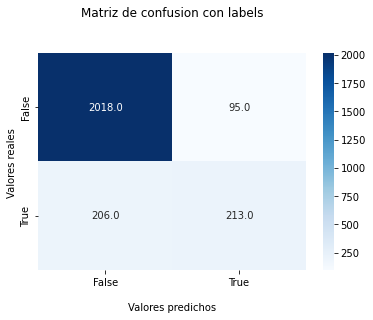

In [ ]:
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones_knn)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True,cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, predicciones))
print('recall_score\n',recall_score(y_test, predicciones))
print('precision_score\n',precision_score(y_test, predicciones))
print('f1_score\n',f1_score(y_test, predicciones))
print('\n\nclassification_report\n\n',classification_report(y_test, predicciones))

accuracy_score
 0.8906003159557662
recall_score
 0.49403341288782815
precision_score
 0.7610294117647058
f1_score
 0.5991316931982634


classification_report

               precision    recall  f1-score   support

           0       0.91      0.97      0.94      2113
           1       0.76      0.49      0.60       419

    accuracy                           0.89      2532
   macro avg       0.83      0.73      0.77      2532
weighted avg       0.88      0.89      0.88      2532



### Prueba4: RandomForestClassifier

Info consultada para usar RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html#sklearn.model_selection.HalvingRandomSearchCV

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html#sklearn.model_selection.HalvingGridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100,
                             max_depth=5, 
                             random_state=0,
                             criterion = 'gini')
clf.fit(X_train, y_train)
y_pred_RFC = clf.predict(X_test)

In [ ]:
print('accuracy_score\n',accuracy_score(y_test, y_pred_RFC))
print('recall_score\n',recall_score(y_test, y_pred_RFC))
print('precision_score\n',precision_score(y_test, y_pred_RFC))
print('f1_score\n',f1_score(y_test, y_pred_RFC))

accuracy_score
 0.9036334913112164
recall_score
 0.45584725536992843
precision_score
 0.9227053140096618
f1_score
 0.610223642172524


Las metricas observadas son bastante buenas comparadas con la regresion logistica. Se procedera a hacer una validacion cruzada para corroborar el ajuste del modelo

In [ ]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(clf,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='precision',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.9202755102570819
0.8849056514531795


In [ ]:
skf = StratifiedKFold(n_splits=5,
                      shuffle=True, 
                      random_state=4)

kfcv_precision =  cross_validate(clf,                   # Indicamos el modelo
                                 X_train,                  # Le pasamos los features de entrenamiento 
                                 y_train,                  # Le pasamos la columna target de entrenamiento
                                 scoring='recall',      # Declaramos que metrica deseamos darle seguimiento
                                 return_train_score=True,  # Indicamos que también queremos ver el comportamiento de la metrica en Train 
                                 cv=skf                    # Le pasamos la cantidad de Folds definidos (tambien puede recibir números directamente)           
                                 )

print(kfcv_precision['train_score'].mean())
print(kfcv_precision['test_score'].mean())

0.5575335983950704
0.5148760330578511


#### Tuneo de hiperparametros

Leyendo la bibliografica de sklearn encontramos diferentes metodos para encontrar los mejores hiperparametos para un modelo RandomForestClasifier

**HalvingGridSearchCV**

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

Este metodo es intensivo en recursos, Lo que hace en el caso planteado a continuacion es hacer una validacion cruzada, probando con todos los parametros ubicados en la param_grid. min_samples_split 5 o 10 y max_depth 3, 10 o 20.

Ademas el valor que modificara para intentar maximizar el scoring seleccionado sera el n_estimators, cuyo valor maximo podria llegar a 800 segun se establecio en max_resources.

In [ ]:
clf = RandomForestClassifier(random_state=0,
                             criterion = 'gini')

param_grid = {"min_samples_split": [5, 10],
              'max_depth':[3,10,20]}
search = HalvingGridSearchCV(clf, param_grid, 
                             resource='n_estimators',  # Este es el recurso que modificara para maximizar el scoring del modelo 
                             max_resources=800,      # Este es el valor maximo que puede tomar este recurso
                             random_state=0,
                             cv = 3,                # Usa CrossValidation con (Stratified)KFold
                             scoring = 'precision').fit(X_train, y_train)
search.best_params_ 

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 798}

el resultado arrojado fue el siguiente

{'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 798} 

Es decir que tomo el valor maximo en max_depth, tomo el minimo en min_samples_split y escogio un valor de n_estimators = 798.

Estos valores los cargaremos en nuestro nuevo modelo de RFC para observar los resultados.


In [ ]:
clf_2 = RandomForestClassifier(n_estimators = 798,
                             max_depth=20 , 
                             random_state=0,
                             min_samples_split = 5,
                             criterion = 'gini')
clf_2.fit(X_train, y_train)
y_pred_RFC_2 = clf_2.predict(X_test)

In [ ]:
print('accuracy_score new       accuracy_score old\n',accuracy_score(y_test, y_pred_RFC_2) ,'    ', accuracy_score(y_test, y_pred_RFC))
print('recall_score new         recall_score old\n',recall_score(y_test, y_pred_RFC_2),'    ',recall_score(y_test, y_pred_RFC))
print('precision_score new      precision_score old\n',precision_score(y_test, y_pred_RFC_2),'    ',precision_score(y_test, y_pred_RFC))
print('f1_score new             f1_score old\n',f1_score(y_test, y_pred_RFC_2),'    ',f1_score(y_test, y_pred_RFC))

accuracy_score new       accuracy_score old
 0.9518167456556083      0.9036334913112164
recall_score new         recall_score old
 0.7589498806682577      0.45584725536992843
precision_score new      precision_score old
 0.9380530973451328      0.9227053140096618
f1_score new             f1_score old
 0.8390501319261213      0.610223642172524


Como podemos observar todas las metricas mejoran notablemente en el modelo ajustado. 

Por lo que se tomara como base para hacer un analisis los siguientes hiperparametros 

n_estimators = 798,
                             max_depth=20 , 
                             random_state=0,
                             min_samples_split = 5,
                             criterion = 'gini'

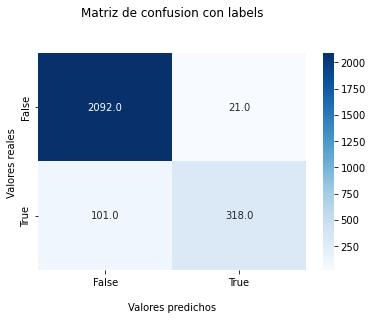

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_RFC_2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

### Comparacion de los mejores modelos

Comparamos las metricas de los dos mejores modelos analizados. LogisticRegression y RandomForestClassifier

In [ ]:
print(' RandomForestClassifier    LogisticRegression\n')
print('accuracy_score RFC         accuracy_score LR\n',accuracy_score(y_test, y_pred_RFC_2) ,'      ', accuracy_score(y_test, y_pred_l1))
print('recall_score RFC           recall_score LR\n',recall_score(y_test, y_pred_RFC_2),'      ',recall_score(y_test, y_pred_l1))
print('precision_score RFC        precision_score LR\n',precision_score(y_test, y_pred_RFC_2),'      ',precision_score(y_test, y_pred_l1))
print('f1_score RFC               f1_score LR\n',f1_score(y_test, y_pred_RFC_2),'      ',f1_score(y_test, y_pred_l1))

 RandomForestClassifier    LogisticRegression

accuracy_score RFC         accuracy_score LR
 0.9518167456556083        0.8961295418641391
recall_score RFC           recall_score LR
 0.7589498806682577        0.5250596658711217
precision_score RFC        precision_score LR
 0.9380530973451328        0.7746478873239436
f1_score RFC               f1_score LR
 0.8390501319261213        0.6258890469416785


Comparamos las dos matrices de confusion de los dos mejores modelos analizados. LogisticRegression y RandomForestClassifier

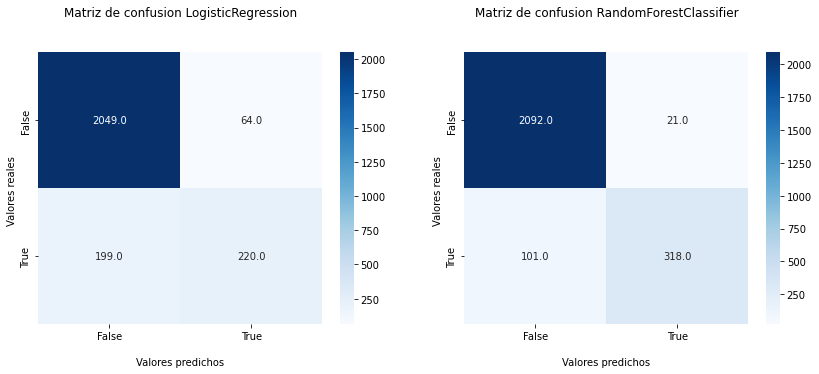

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(14, 5))
cf_matrix = confusion_matrix(y_test, y_pred_l1)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f',ax=axes[0])
ax.set_title('Matriz de confusion LogisticRegression\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

cf_matrix = confusion_matrix(y_test, y_pred_RFC_2)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='.1f',ax=axes[1])
ax.set_title('Matriz de confusion RandomForestClassifier\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

Como conclusion, seleccionaremos el modelo de RandomForestClassifier ajustando los hiperparametros como se establece en dicho modelo. 

Esto arrojo los mejores resultados en todas las metricas.